<a href="https://colab.research.google.com/github/vendo495/projects/blob/main/movies.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
print('All lib imported')

All lib imported


In [ ]:
# UserID::Gender::Age::Occupation::Zip-code
df_user=pd.read_csv('users.dat',sep='::',names=['UserID','Gender','Age','Occupation','Zip-code'],engine='python')


In [ ]:
df_rating=pd.read_csv('ratings.dat',sep='::',names=['UserID','MovieID','Rating','Timestamp'],engine='python')


In [ ]:
df_movies=pd.read_csv('movies.dat',sep='::',names=['MovieID','Title','Genres'],engine='python',encoding='latin-1')


In [ ]:
df_movies=pd.read_csv('movies.dat',sep='::',names=['MovieID','Title','Genres'],engine='python',encoding='latin-1')


In [ ]:
# Merge movie with ratings
df_movierating=df_movies.merge(df_rating,on='MovieID',how='inner')
df_movierating


,MovieID,Title,Genres,UserID,Rating,Timestamp
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,978824268
1,1,Toy Story (1995),Animation|Children's|Comedy,6,4,978237008
2,1,Toy Story (1995),Animation|Children's|Comedy,8,4,978233496
3,1,Toy Story (1995),Animation|Children's|Comedy,9,5,978225952
4,1,Toy Story (1995),Animation|Children's|Comedy,10,5,978226474
...,...,...,...,...,...,...
1000204,3952,"Contender, The (2000)",Drama|Thriller,5812,4,992072099
1000205,3952,"Contender, The (2000)",Drama|Thriller,5831,3,986223125
1000206,3952,"Contender, The (2000)",Drama|Thriller,5837,4,1011902656
1000207,3952,"Contender, The (2000)",Drama|Thriller,5927,1,979852537


In [ ]:
# Merge movie with ratings
df_Master=df_movierating.merge(df_user,on='UserID',how='inner')
df_Master


,MovieID,Title,Genres,UserID,Rating,Timestamp,Gender,Age,Occupation,Zip-code
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,978824268,F,1,10,48067
1,48,Pocahontas (1995),Animation|Children's|Musical|Romance,1,5,978824351,F,1,10,48067
2,150,Apollo 13 (1995),Drama,1,5,978301777,F,1,10,48067
3,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Fantasy|Sci-Fi,1,4,978300760,F,1,10,48067
4,527,Schindler's List (1993),Drama|War,1,5,978824195,F,1,10,48067
...,...,...,...,...,...,...,...,...,...,...
1000204,3513,Rules of Engagement (2000),Drama|Thriller,5727,4,958489970,M,25,4,92843
1000205,3535,American Psycho (2000),Comedy|Horror|Thriller,5727,2,958489970,M,25,4,92843
1000206,3536,Keeping the Faith (2000),Comedy|Romance,5727,5,958489902,M,25,4,92843
1000207,3555,U-571 (2000),Action|Thriller,5727,3,958490699,M,25,4,92843


In [ ]:
# check null values
df_Master.isnull().sum().any()


False

In [ ]:
# Save this data as csv file
df_Master.to_csv("Master.csv")
print('Data Saved')


Data Saved


In [ ]:
# User Age Distribution
df_Master['Age'].value_counts()


25    395556
35    199003
18    183536
45     83633
50     72490
56     38780
1      27211
Name: Age, dtype: int64

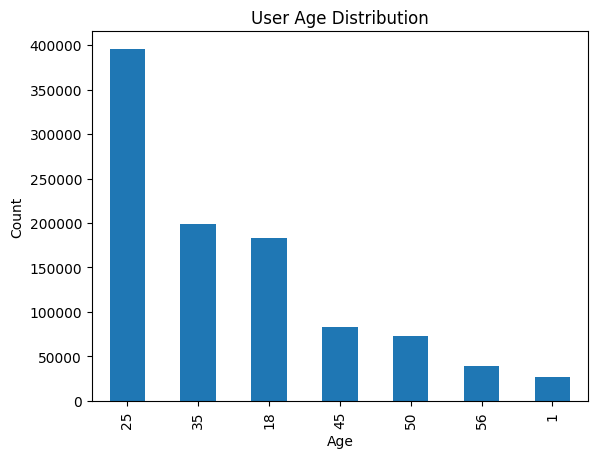

In [ ]:
df_Master['Age'].value_counts().plot(kind='bar')
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('User Age Distribution')
plt.show()


In [ ]:
toystory=df_Master[df_Master['Title'].str.contains('Toy Story')==True]
toystory


,MovieID,Title,Genres,UserID,Rating,Timestamp,Gender,Age,Occupation,Zip-code
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,978824268,F,1,10,48067
50,3114,Toy Story 2 (1999),Animation|Children's|Comedy,1,4,978302174,F,1,10,48067
53,1,Toy Story (1995),Animation|Children's|Comedy,6,4,978237008,F,50,9,55117
124,1,Toy Story (1995),Animation|Children's|Comedy,8,4,978233496,M,25,12,11413
263,1,Toy Story (1995),Animation|Children's|Comedy,9,5,978225952,M,25,17,61614
...,...,...,...,...,...,...,...,...,...,...
998988,3114,Toy Story 2 (1999),Animation|Children's|Comedy,3023,4,970471948,F,25,7,92108
999027,3114,Toy Story 2 (1999),Animation|Children's|Comedy,5800,5,958015250,M,35,18,90804
999486,3114,Toy Story 2 (1999),Animation|Children's|Comedy,2189,4,974607816,M,1,10,60148
999869,3114,Toy Story 2 (1999),Animation|Children's|Comedy,159,4,989966944,F,45,0,37922


In [ ]:
toystory.groupby(['Title','Rating']).size()

Title               Rating
Toy Story (1995)    1          16
                    2          61
                    3         345
                    4         835
                    5         820
Toy Story 2 (1999)  1          25
                    2          44
                    3         214
                    4         578
                    5         724
dtype: int64

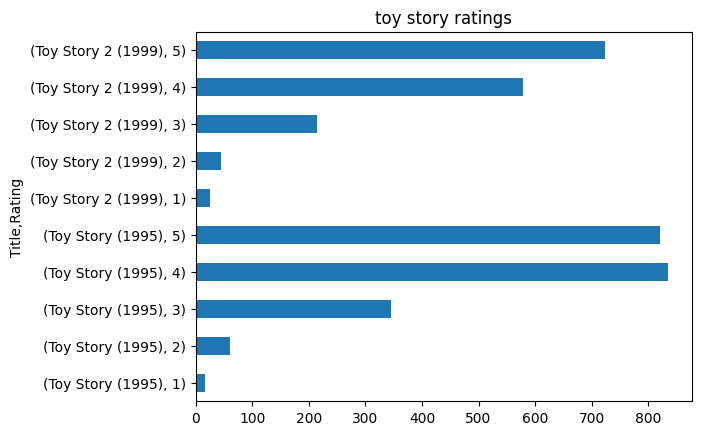

In [ ]:
toystory.groupby(['Title','Rating']).size().plot(kind='barh')
plt.title('toy story ratings')
plt.show()


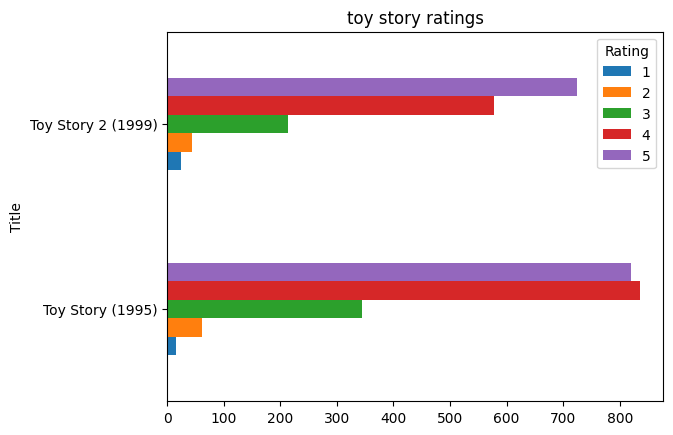

In [ ]:
toystory.groupby(['Title','Rating']).size().unstack().plot(kind='barh')
plt.title('toy story ratings')
plt.show()


In [ ]:
dfTop25=df_Master.groupby('Title').size().sort_values(ascending=False)[:25]
dfTop25


Title
American Beauty (1999)                                   3428
Star Wars: Episode IV - A New Hope (1977)                2991
Star Wars: Episode V - The Empire Strikes Back (1980)    2990
Star Wars: Episode VI - Return of the Jedi (1983)        2883
Jurassic Park (1993)                                     2672
Saving Private Ryan (1998)                               2653
Terminator 2: Judgment Day (1991)                        2649
Matrix, The (1999)                                       2590
Back to the Future (1985)                                2583
Silence of the Lambs, The (1991)                         2578
Men in Black (1997)                                      2538
Raiders of the Lost Ark (1981)                           2514
Fargo (1996)                                             2513
Sixth Sense, The (1999)                                  2459
Braveheart (1995)                                        2443
Shakespeare in Love (1998)                               2369
Pr

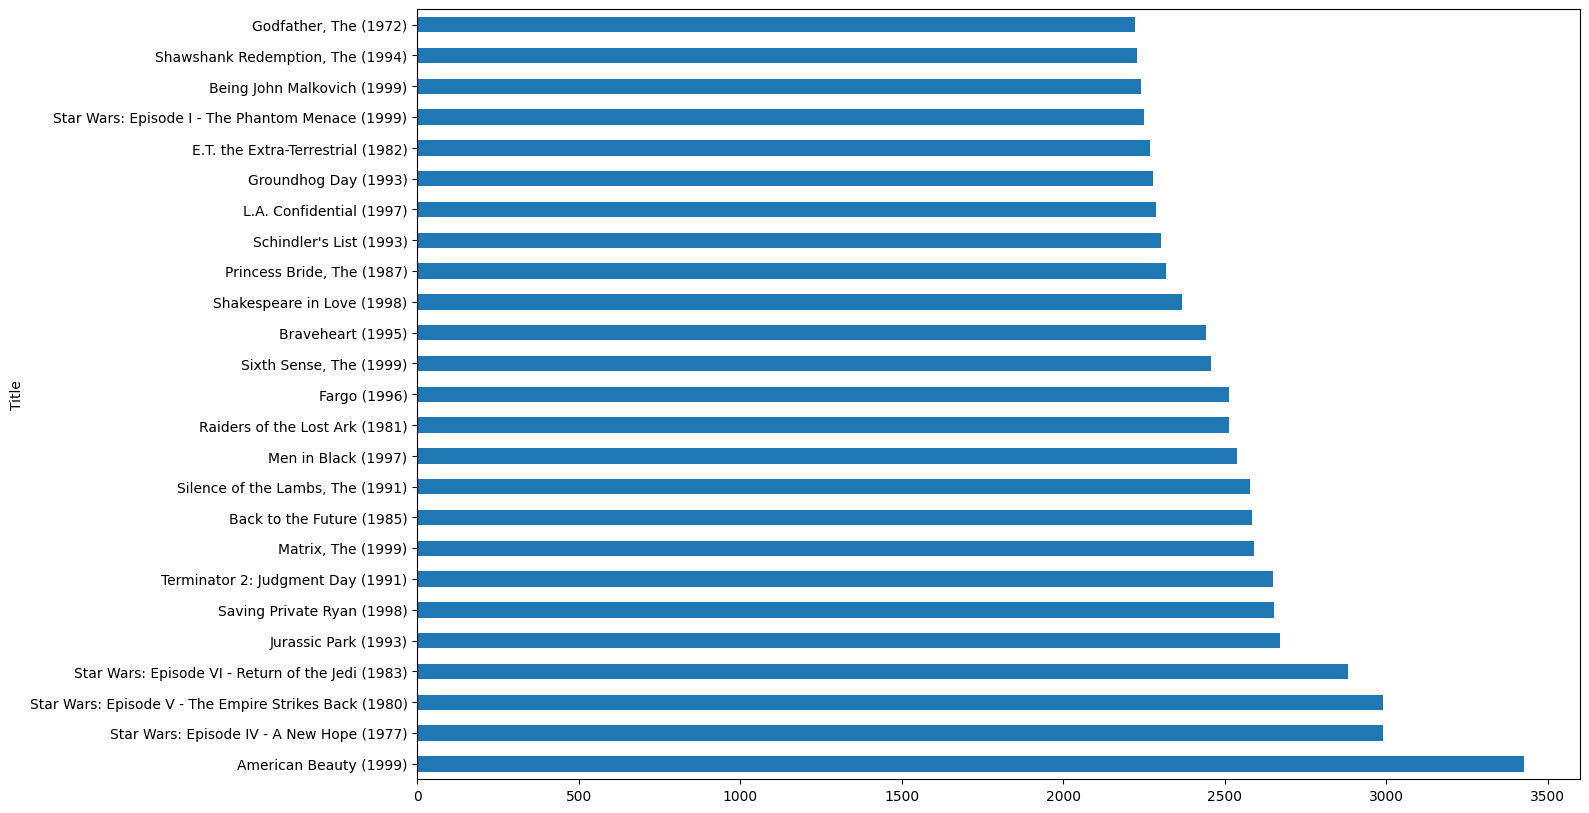

In [ ]:
plt.figure(figsize=(15,10))
dfTop25.plot(kind='barh')
plt.show()


In [ ]:
df_Master[df_Master['UserID'] == 2696].shape


(20, 10)

In [ ]:
dfGeners=df_Master['Genres'].str.split('|')

In [ ]:
# create unique data
list_genres=set()
for genre in dfGeners:
    list_genres=list_genres.union(set(genre))


In [ ]:
GenresOnehot=df_Master['Genres'].str.get_dummies('|')


In [ ]:
df_Master=pd.concat([df_Master,GenresOnehot],axis=1)


In [ ]:
df_Master1=df_Master.copy()


In [ ]:
new_data=df_Master1[:500]


In [ ]:
new_data=new_data[['MovieID','Rating','Gender','Age', 'Occupation','Action', 'Adventure', 'Animation', 'Children\'s', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy',
       'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi',
       'Thriller', 'War', 'Western']]


In [ ]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 0 to 499
Data columns (total 23 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   MovieID      500 non-null    int64 
 1   Rating       500 non-null    int64 
 2   Gender       500 non-null    object
 3   Age          500 non-null    int64 
 4   Occupation   500 non-null    int64 
 5   Action       500 non-null    int64 
 6   Adventure    500 non-null    int64 
 7   Animation    500 non-null    int64 
 8   Children's   500 non-null    int64 
 9   Comedy       500 non-null    int64 
 10  Crime        500 non-null    int64 
 11  Documentary  500 non-null    int64 
 12  Drama        500 non-null    int64 
 13  Fantasy      500 non-null    int64 
 14  Film-Noir    500 non-null    int64 
 15  Horror       500 non-null    int64 
 16  Musical      500 non-null    int64 
 17  Mystery      500 non-null    int64 
 18  Romance      500 non-null    int64 
 19  Sci-Fi       500 non-null    

In [ ]:
# Convert Gender M-0 AND f-1
new_data['Gender']=new_data['Gender'].replace({'M':0,'F':1})


In [ ]:
X=new_data[['MovieID', 'Gender', 'Age', 'Occupation', 'Action',
       'Adventure', 'Animation', 'Children\'s', 'Comedy', 'Crime',
       'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical',
       'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']].values


In [ ]:
y=new_data[['Rating']].values


In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42)


In [ ]:
# Apply Linear Regression
from sklearn.linear_model import LinearRegression
lr=LinearRegression()


In [ ]:
lr.fit(X_train,y_train)

LinearRegression()

In [ ]:
y_pred=lr.predict(X_test)


In [ ]:
# print the error
from sklearn.metrics import mean_squared_error
print('Mean Squared Error',mean_squared_error(y_test,y_pred))


Mean Squared Error 0.6647913979865335


In [ ]:
from sklearn.metrics import r2_score
print('r2_score',r2_score(y_test,y_pred))


r2_score -0.09864716243023208
